In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as sps

In [2]:
def z(J):
    return np.exp(-2*J)

def mag(J):
    enum = (1+z(J)**2)**0.25 * (1-6*z(J)**2 + z(J)**4)**0.125
    den = (1-z(J)**2)**0.5
    return enum/den

def kappa(J):
    return 2 * np.sinh(2 * J) / (np.cosh(2 * J)**2)

def kappa_prime(J):
    return 2 * np.tanh(2 * J)**2 - 1

def ising_energy(J):
    k = kappa(J)
    kp = kappa_prime(J)
    return -J*coth(2 * J) * (1 + (2 / np.pi) * kp * sps.ellipk(k))

def coth(x):
    return np.cosh(x) / np.sinh(x)


def ch(j):
    kp = kappa_prime(j)
    k = kappa(j)
    a = 2/np.pi * (j * coth(2*j))**2
    bracket = 2*sps.ellipk(k) - 2*sps.ellipe(k)-(1-kp)*(np.pi/2 + kp*sps.ellipk(k))
    return a*bracket

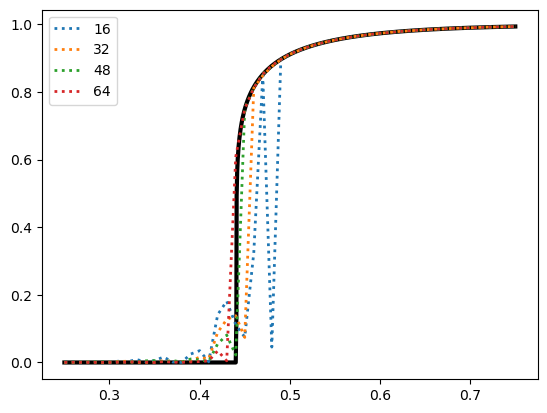

In [3]:
j_lower = np.linspace(0.25,0.44,1000)
j_upper = np.linspace(0.4406868,0.75,1000)

j = np.concatenate((j_lower, j_upper))
magnet = np.concatenate((np.zeros(len(j_lower)), mag(j_upper)))
plt.plot(j, magnet, lw=3, color='k')

for k in [16, 32, 48, 64]:
    df = pd.read_csv(f'/home/patrick/Projects/chm560/out_{k}x{k}.csv')
    plt.plot(df['J'], df['M'], label=k, linestyle='dotted', marker='', alpha=1., lw=2)

plt.legend()

/tmp/ipykernel_985636/2143202732.py:21: RuntimeWarning: divide by zero encountered in divide
  return np.cosh(x) / np.sinh(x)
/tmp/ipykernel_985636/2143202732.py:27: RuntimeWarning: invalid value encountered in multiply
  a = 2/np.pi * (j * coth(2*j))**2


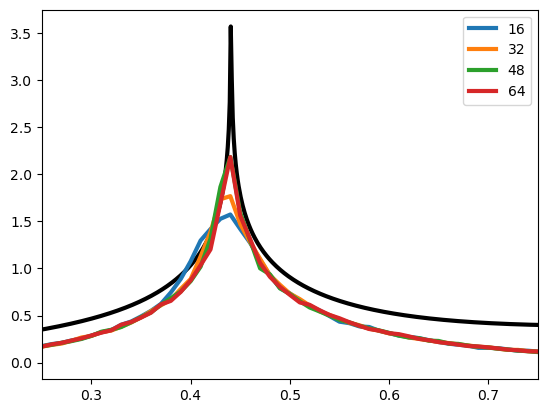

In [7]:
j=np.linspace(0,1,1000)
plt.plot(j, ch(j),lw=3, color='k')
plt.xlim(0.25,0.75)

for k in [16, 32, 48, 64]:
    df = pd.read_csv(f'/home/patrick/Projects/chm560/out_{k}x{k}.csv')
    plt.plot(df['J'], df['X']/k**2, label=k, linestyle='-', marker='', alpha=1., lw=3)


plt.legend()


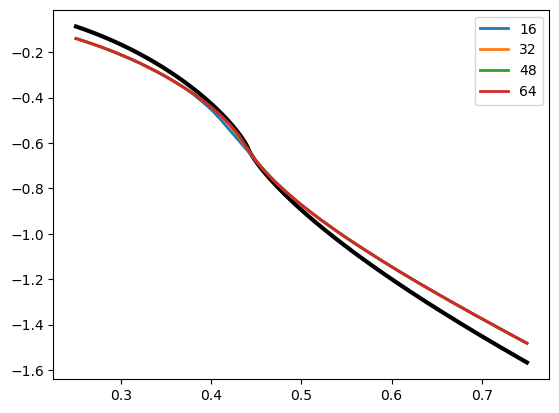

In [8]:
j = np.linspace(0.25, .75,10000)
plt.plot(j, ising_energy(j), lw=3, color='k')

for k in [16, 32, 48, 64]:
    df = pd.read_csv(f'/home/patrick/Projects/chm560/out_{k}x{k}.csv')
    plt.plot(df['J'], df['E']/k**2, label=k, linestyle='-', marker='', alpha=1., lw=2)


plt.legend()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

# Definitions for kappa, kappa_prime, and energy
def kappa(J):
    return 2 * np.sinh(2 * J) / (np.cosh(2 * J)**2)

def kappa_prime(J):
    return 2 * np.tanh(2 * J)**2 - 1

def ising_energy(J):
    k = kappa(J)
    kp = kappa_prime(J)
    return -J*coth(2 * J) * (1 + (2 / np.pi) * kp * ellipk(k))

# Generate data
J_values = np.linspace(0.25, 0.75, 100)  # Avoid division by zero
energy_values = ising_energy(J_values)